In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf


In [3]:
iris = pd.read_csv("Iris.csv")

1. Cree una copia del conjunto de datos original.

In [4]:
iris_copia = iris.copy()

2. >De que tipo es cada una de las variables del conjunto de datos?

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


3. Cambia los valores de las variables Sepal.Length y Sepal.Width de las 5
primeras y las 10 ultimas observaciones por NA.

In [6]:
iris.loc[:4, ["SepalLengthCm"]] = np.nan
iris.loc[:4, ["SepalWidthCm"]] = np.nan



In [7]:
print(iris.loc[:4]["SepalLengthCm"])
print(iris.loc[:4]["SepalWidthCm"])

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: SepalLengthCm, dtype: float64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: SepalWidthCm, dtype: float64


In [8]:
iris.loc[iris.shape[0]-10:, ["SepalLengthCm", "SepalWidthCm"]] = np.nan


In [9]:
iris.loc[iris.shape[0]-10:, ["SepalLengthCm", "SepalWidthCm"]]

,SepalLengthCm,SepalWidthCm
140,NaN,NaN
141,NaN,NaN
142,NaN,NaN
143,NaN,NaN
144,NaN,NaN
145,NaN,NaN
146,NaN,NaN
147,NaN,NaN
148,NaN,NaN
149,NaN,NaN


Cambia esos valores primeros 5 registros NA por el ratio entre la nota que
te mereces y la nota que esperas por este ejercicio y los ultimos 10 por
la diferencia entra la nota que te mereces y la nota que esperas por este
ejercicio.

In [10]:
# notas ratio y diferencias

ratio = 9 / 8 

diferencia = 9 - 8  

#reemplazo 
iris.iloc[:5, 1:3] = iris.iloc[:5, 1:3].fillna(ratio)

iris.iloc[-10:, 1:3] = iris.iloc[-10:, 1:3].fillna(diferencia)

5. Del apartado 1 haga otra copia y cree una columna que se llame \Total"
que sea la suma por la de las columnas numericas.



In [11]:
#segunda copia

iris_copia2 = iris_copia.copy()

# Creo la columna total con la suma de las otras columnas numericas (utilizamos axis=1 para que haga la suma de manera horizontal)

iris_copia2["Total"] = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].sum(axis=1)



In [12]:
iris_copia2.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Total
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,13.854667
std,43.445368,0.828066,0.433594,1.764420,0.763161,3.128149
min,1.000000,4.300000,2.000000,1.000000,0.100000,8.400000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,10.700000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,14.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,16.250000
max,150.000000,7.900000,4.400000,6.900000,2.500000,20.400000


6. Calcule la suma total de todos los registros numericos.
7. Calcule la media total de todos los registros numericos.
8. Calcule la varianza total de todos los registros numericos
9. Calcula el coeciente de variacion de todos los registros numericos.

In [13]:
total_sum = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].sum().sum()
print("la suma total es igual a:",total_sum)

total_mean = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values.mean()
print("la media total es igual a:",total_mean)

total_var = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values.var()
print("la variacion total es igual a:",total_var)

total_std = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values.std()
print("la desviacion estandar es igual a:",total_std)

coeficiente_var = total_std/total_mean
print("El coeficiente de variacion es igual a:",coeficiente_var)



la suma total es igual a: 2078.2
la media total es igual a: 3.4636666666666662
la variacion total es igual a: 3.896679888888889
la desviacion estandar es igual a: 1.974000985027335
El coeficiente de variacion es igual a: 0.5699165580869989


10. Elimine aquellas columnas que no pertenezcan al conjunto de datos original.

In [14]:
iris_copia2 = iris_copia2.drop("Total",axis=1)


In [15]:
iris_copia2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


11. Calcule las medias de cada una de las variables numericas.
12. Calcule las varianzas de cada una de las variables numericas.


In [16]:
iris_mean = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].mean()
print(iris_mean)

iris_var = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].var()
print(iris_var)

SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64
SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64


13. Calcule el coeciente de asimetra de cada una de las variables numericas.

In [17]:
iris_asim = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].skew()
print(iris_asim)

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64


14. Calcule el coeciente de curtosis de cada una de las variables numericas y
de que tipo es.

In [18]:
iris_kurtosis = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].kurtosis()
print(iris_kurtosis)

SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64


In [19]:
# creo un df de los resultados de iris_kurtosis
df_kurt = pd.DataFrame(iris_kurtosis, columns=["Kurtosis"])
df_kurt

# agrego una columna con el resultado utilizando un lambda

df_kurt["tipo_kurtosis"] = df_kurt["Kurtosis"].apply(lambda x: "leptocurtica" if x>0 else
                                                                "platicurtica" if x<0 else
                                                                "mesocurtica")  

df_kurt

,Kurtosis,tipo_kurtosis
SepalLengthCm,-0.552064,platicurtica
SepalWidthCm,0.290781,leptocurtica
PetalLengthCm,-1.401921,platicurtica
PetalWidthCm,-1.339754,platicurtica


15. Calcula la mediana de cada una de las variables numericas.

In [20]:
iris_median = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].median()
print(iris_median)

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64


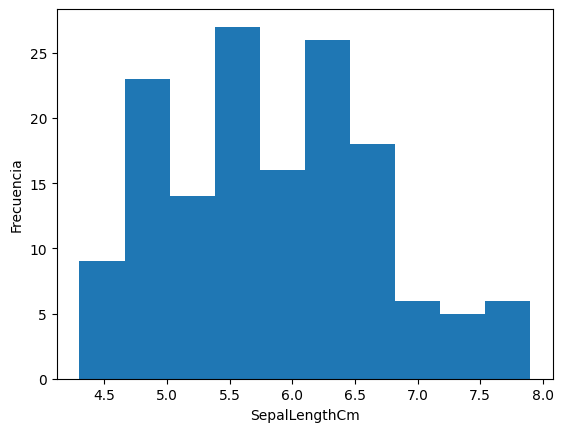

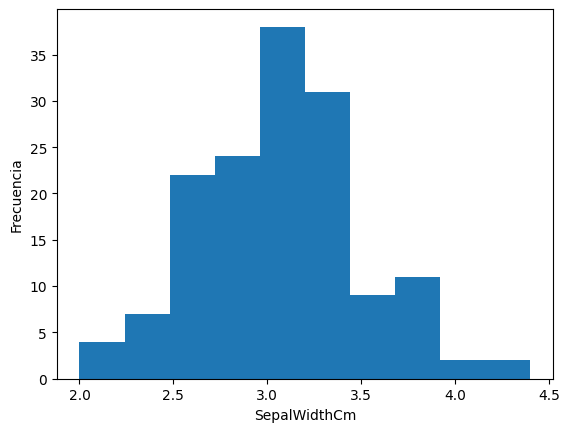

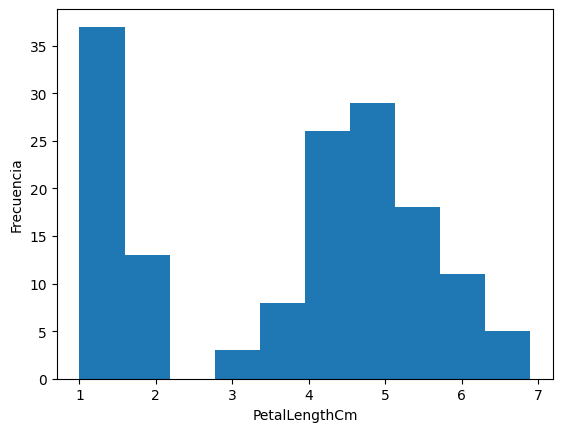

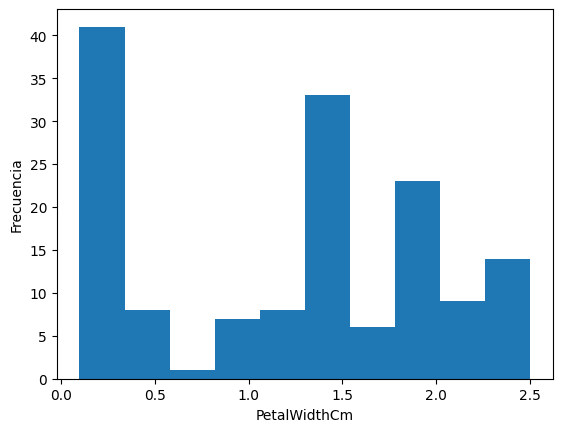

In [21]:
listado_columnas = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

for i in listado_columnas:
    plt.hist(iris_copia2[i])
    plt.xlabel(i)
    plt.ylabel("Frecuencia")
    plt.show()

17. Calcule los percentiles 20 y 60 de cada una de las variables numericas.

In [22]:
iris_q20 = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].quantile(0.2)
print(iris_q20)

iris_q60 = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].quantile(0.6)
print(iris_q60)

SepalLengthCm    5.0
SepalWidthCm     2.7
PetalLengthCm    1.5
PetalWidthCm     0.2
Name: 0.2, dtype: float64
SepalLengthCm    6.10
SepalWidthCm     3.10
PetalLengthCm    4.64
PetalWidthCm     1.50
Name: 0.6, dtype: float64


18. Calcule el rango intercuartlico de cada una de las variables numericas.

In [23]:
info_iris = iris_copia2[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].describe().T
info_iris

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [24]:
info_iris["RIQ"] = info_iris["75%"] - info_iris["25%"]
print(info_iris["RIQ"])

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
Name: RIQ, dtype: float64


19. Calcule la variable Limite Inferior que es el cuartil 1 menos 1,5 veces el
rango intercuartilico de cada una de las variables numericas.

In [25]:
info_iris["Limite_Inferior"] = info_iris["25%"] - 1.5 * info_iris["RIQ"]
print(info_iris["Limite_Inferior"])

info_iris["Limite_superior"] = info_iris["75%"] + 1.5 * info_iris["RIQ"]
print(info_iris["Limite_superior"])

SepalLengthCm    3.15
SepalWidthCm     2.05
PetalLengthCm   -3.65
PetalWidthCm    -1.95
Name: Limite_Inferior, dtype: float64
SepalLengthCm     8.35
SepalWidthCm      4.05
PetalLengthCm    10.35
PetalWidthCm      4.05
Name: Limite_superior, dtype: float64


19. Calcule la variable Limite Inferior que es el cuartil 1 menos 1,5 veces el
rango intercuartilico de cada una de las variables numericas.
20. Calcule cuantos elementos se quedan por debajo de de cada Limite Inferior
de cada una de las variables numericas.
21. Calcule la variable Limite Superior que es el cuartil 3 mas 1,5 veces el
rango intercuartilico de cada una de las variables numericas.
22. Calcule cuantos elementos se quedan por encima de de cada Limite Superior
de cada una de las variables numericas.

In [26]:

listado_columnas

#Creo un diccionario con los limites inferiores de cada una de las columnas
dic_lim_inf = dict(info_iris["Limite_Inferior"])
#Creun un diccionario con los limites superiores de cada una de las columnas
dic_lim_sup = dict(info_iris["Limite_superior"])

# con un for recorro las columnas y voy sumando los valores que son menores al limite inferior y los valores mayores al lim superior
# luego los imprimo
for i in listado_columnas:
    valor_menor = sum(iris_copia2[i].values < dic_lim_inf[i])
    print(f"En la columna {i} tenemos {valor_menor} valores menores al limite inferior")
    valor_sup = sum(iris_copia2[i].values > dic_lim_sup[i])
    print(f"En la columna {i} tenemos {valor_sup} valores mayores al limite superior")




En la columna SepalLengthCm tenemos 0 valores menores al limite inferior
En la columna SepalLengthCm tenemos 0 valores mayores al limite superior
En la columna SepalWidthCm tenemos 1 valores menores al limite inferior
En la columna SepalWidthCm tenemos 3 valores mayores al limite superior
En la columna PetalLengthCm tenemos 0 valores menores al limite inferior
En la columna PetalLengthCm tenemos 0 valores mayores al limite superior
En la columna PetalWidthCm tenemos 0 valores menores al limite inferior
En la columna PetalWidthCm tenemos 0 valores mayores al limite superior


23. Cree un nuevo conjunto de datos donde por cada variable numerica que
tiene el conjunto de datos, sustituya los registros que sean superiores o
inferiores a los Limites Superior e Inferior respectivamente y por su lmite
que le corresponde.

In [27]:
listado_columnas
dic_lim_inf
dic_lim_sup

# creo una copia
df_iris3 = iris_copia2.copy()

# con un for recorro todas las columnas y con un lambda verifico si el valor es mayor al limite superior, que lo reemplace por el lim superior. Si es menor al limite infoerior que lo reemplace por el limite inf, si no que quede ese valor
for i in listado_columnas:
    df_iris3[i]=df_iris3[i].apply(lambda x: dic_lim_sup[i] if x > dic_lim_sup[i] else
                                  dic_lim_inf[i] if x < dic_lim_inf[i] else
                                   x )
    
df_iris3

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Calcule el coeciente de correlacion lineal de cada una de las variables
originales con otra original.

In [28]:
correlaciones = df_iris3[listado_columnas].corr()
correlaciones

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110343,0.871754,0.817954
SepalWidthCm,-0.110343,1.000000,-0.419823,-0.355582
PetalLengthCm,0.871754,-0.419823,1.000000,0.962757
PetalWidthCm,0.817954,-0.355582,0.962757,1.000000


25. Dibuje un mapa de calor de dichas correlaciones.

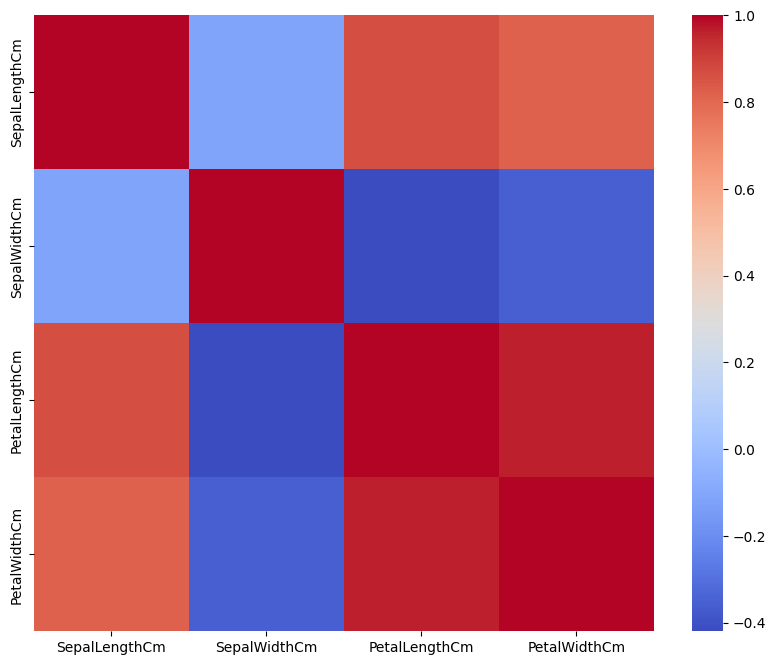

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(correlaciones, cmap='coolwarm')
plt.show()

Cree una funcion donde muestre por pantalla la variable que mas correlacion
tenga con otra variable.

In [30]:

def corr_maxima(df_corr):

    """
    Identifica las columnas en un DataFrame de correlación que tienen la correlación más alta entre sí y devuelve los nombres de las columnas
    
    Parametros: (df de correlaciones)

    """
    df_sin_1 = df_corr.replace(1,0)
    valor_max = df_sin_1.max().max()
    posicion = np.where(df_sin_1 == valor_max)
    return (df_corr.index[posicion[0]], df_corr.columns[posicion[1]])


In [31]:
corr_maxima(correlaciones)

(Index(['PetalLengthCm', 'PetalWidthCm'], dtype='object'),
 Index(['PetalWidthCm', 'PetalLengthCm'], dtype='object'))

27. Calcule la recta de regresion entre las dos variables que mas correlacion
lineal tenga en valor absoluto.

In [32]:
modelo=smf.ols("PetalLengthCm~PetalWidthCm",data=df_iris3).fit()

In [33]:
parametros=modelo.params.to_dict()

In [34]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PetalLengthCm   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           5.78e-86
Time:                        12:46:14   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0906      0.073     14.951      0.000       0.946       1.235
PetalWidthCm     2.2259      0.051     43.320      0.000       2.124       2.327
==============================================================================
Omnibus:                        2.326   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.852
Skew:                           0.210   Prob(JB):                        0.396
Kurtosis:                       3.347   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
df_iris3["PetalLengthCm_modelo"]=modelo.predict(df_iris3)
df_iris3


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalLengthCm_modelo
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.535749
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.535749
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.535749
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.535749
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.535749
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,6.210108
146,147,6.3,2.5,5.0,1.9,Iris-virginica,5.319754
147,148,6.5,3.0,5.2,2.0,Iris-virginica,5.542343
148,149,6.2,3.4,5.4,2.3,Iris-virginica,6.210108


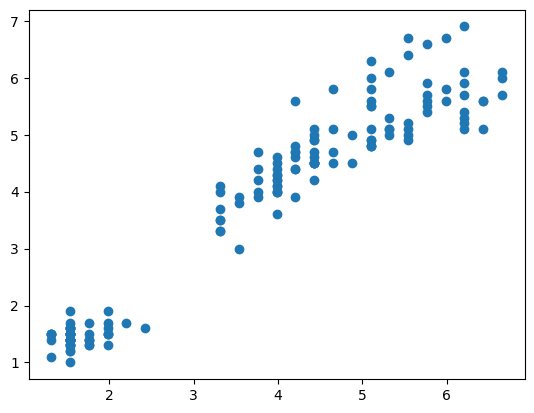

In [36]:
plt.scatter(df_iris3["PetalLengthCm_modelo"],df_iris3["PetalLengthCm"]);

In [37]:
modelo_sk=LinearRegression()


In [38]:
#modelo_entrenado=modelo_sk.fit(df[Variable_Independiente],df[Variable_Dependiente])

modelo_entrenado = modelo_sk.fit(df_iris3[["PetalWidthCm"]], df_iris3["PetalLengthCm"])



In [39]:
df_iris3["PetalLengthCm_SK"] = modelo_entrenado.predict(df_iris3[["PetalWidthCm"]])


In [40]:
df_iris3

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalLengthCm_modelo,PetalLengthCm_SK
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.535749,1.535749
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.535749,1.535749
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.535749,1.535749
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.535749,1.535749
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.535749,1.535749
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,6.210108,6.210108
146,147,6.3,2.5,5.0,1.9,Iris-virginica,5.319754,5.319754
147,148,6.5,3.0,5.2,2.0,Iris-virginica,5.542343,5.542343
148,149,6.2,3.4,5.4,2.3,Iris-virginica,6.210108,6.210108


28. Cree una columna que se llame \y pred" que contenga la prediccion de
utilizar la recta de regresion.
29. Cree una columna que se llame \Error Absoluto" que contenga la diferencia
en valor absoluto de la variable dependiente y la columna \y pred".
30. Cree una columna que se llame \Error Cuadratico" que contenga la diferencia
al cuadrado de la variable dependiente y la columna \y pred".

In [41]:
df_iris3["Error_Absoluto"] = abs(df_iris3["PetalLengthCm"] - df_iris3["PetalLengthCm_modelo"])
df_iris3["Error_Cuadratico"] = (df_iris3["PetalLengthCm"] - df_iris3["PetalLengthCm_modelo"])**2


In [42]:
df_iris3

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalLengthCm_modelo,PetalLengthCm_SK,Error_Absoluto,Error_Cuadratico
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.535749,1.535749,0.135749,0.018428
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.535749,1.535749,0.135749,0.018428
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.535749,1.535749,0.235749,0.055578
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.535749,1.535749,0.035749,0.001278
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.535749,1.535749,0.135749,0.018428
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,6.210108,6.210108,1.010108,1.020319
146,147,6.3,2.5,5.0,1.9,Iris-virginica,5.319754,5.319754,0.319754,0.102243
147,148,6.5,3.0,5.2,2.0,Iris-virginica,5.542343,5.542343,0.342343,0.117199
148,149,6.2,3.4,5.4,2.3,Iris-virginica,6.210108,6.210108,0.810108,0.656276


31. Del conjunto de datos creado en 23, calcule la recta de regresion entre las
dos variables que se utilizaron en el apartado 27.
2
32. Cree una columna que se llame \y pred" que contenga la prediccion de
utilizar la recta de regresion.
33. Cree una columna que se llame \Error Absoluto" que contenga la diferencia
en valor absoluto de la variable dependiente y la columna \y pred".
34. >La suma de los Errores Absolutos del apartado 27 es igual a la suma de
los Errores Absolutos en este apartado?
35. Cree una columna que se llame \Error Cuadratico" que contenga la diferencia
al cuadrado de la variable dependiente y la columna \y pred".
36. >La suma de los Errores Cuadraticos del apartado 27 es igual a la suma
de los Errores Cuadraticos en este apartado?

In [43]:
iris_copia4 = iris_copia2.copy()

In [44]:
modelo1=smf.ols("SepalLengthCm~SepalWidthCm",data=iris_copia4).fit()

modelo2=smf.ols("SepalLengthCm~SepalWidthCm",data=df_iris3).fit()


iris_copia4["SepalLengthCm_modelo1"]=modelo1.predict(iris_copia4)
iris_copia4["SepalLengthCm_modelo2"]=modelo2.predict(df_iris3)




In [45]:
iris_copia4["Error_Absoluto1"] = abs(iris_copia4["SepalLengthCm"] - iris_copia4["SepalLengthCm_modelo1"])
iris_copia4["Error_Absoluto2"] = abs(iris_copia4["SepalLengthCm"] - iris_copia4["SepalLengthCm_modelo2"])



In [46]:
iris_copia4["Diferencia_error_abosluto"] = iris_copia4["Error_Absoluto1"] - iris_copia4["Error_Absoluto2"]


In [47]:
iris_copia4["Diferencia_error_abosluto"].mean()

0.00043401886465409473

37. Del apartado 1 haga otra copia, ordene de mayor a menor la segunda
columna numerica y a partir de ah elimine los registros que ocupen la
posicion donde este:
La mediana.
El percentil 10.
El percentil 50.
El percentil 80.

In [48]:
iris_copia5 = iris.copy()


In [49]:
#ordeno los valores por la columnas "SepalWidthCm"

iris_copia5 = iris_copia5.sort_values(by='SepalWidthCm', ascending=False)

# saco los cuantiles
p10 = iris_copia5['SepalWidthCm'].quantile(0.10)
p50 = iris_copia5['SepalWidthCm'].quantile(0.50) 
p80 = iris_copia5['SepalWidthCm'].quantile(0.80)

#elimino las filas donde el valor sea igual a cada uno de los cuantiles

iris_copia5 = iris_copia5.drop(iris_copia5[iris_copia5['SepalWidthCm'] == p10].index)
iris_copia5 = iris_copia5.drop(iris_copia5[iris_copia5['SepalWidthCm'] == p50].index)
iris_copia5 = iris_copia5.drop(iris_copia5[iris_copia5['SepalWidthCm'] == p80].index)

In [50]:
iris_copia5.shape

(117, 6)

38. Estudie si cada una de las variables num ́ericas siguen una Distribuci ́on
Normal.

In [51]:
listado_columnas5 = list(iris_copia5.columns)


In [52]:
listado_columnas5.remove("Id")


In [53]:
listado_columnas5.remove("Species")


In [72]:
listado_columnas5

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [54]:
from scipy.stats import shapiro

# recorro las columnas con un for y a cada una le realizo la prueba de shapiro
# si el p valor es mayor a 0,05 la variable sigue una dist normal, de lo contrario no sigue una distribucion normal

for i in listado_columnas5:
    estadistico, p_value = shapiro(iris_copia5[i])

    if p_value > 0.05:
        print(f"La distribución de {i} sigue una distribución normal")
    else:
        print(f"La distribución de {i} no sigue una distribución normal")

La distribución de SepalLengthCm no sigue una distribución normal
La distribución de SepalWidthCm no sigue una distribución normal
La distribución de PetalLengthCm no sigue una distribución normal
La distribución de PetalWidthCm no sigue una distribución normal


39. Estudie si todas las variables num ́ericas tienen la misma media, en caso
contrario, estudie si alguna variable num ́erica tiene la misma media que
otra.

In [55]:
# hago un listadeo de las medias de las variables

medias = list(iris_copia5.mean())

# con un set comparo los grupos de la lista de medias. Si el set de medias es menor, es porque akgun valor es repetido, por lo que alguna media es igual a otra. De lo contrario, todas las medias son diferentes.
if len(medias) == len(set(medias)):
    print(" no tenemos medias iguales")
else:
    print("hay variables con las mismas medias")

 no tenemos medias iguales


C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\853755992.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medias = list(iris_copia5.mean())


40. Del apartado 1 haga otra copia, calcule cuantos valores distintos tiene la
variable categ ́orica.

In [56]:
iris_copia6 = iris.copy()

In [57]:
iris_copia6["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

41. Haga tantos conjunto de datos como necesite por cada uno de los valores
distintos del apartado anterior:

In [58]:
lista_species = list(iris_copia6["Species"].unique())


In [59]:
lista_species

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [60]:
grupo_setosa = iris_copia6[iris_copia6['Species'] == 'Iris-setosa']
grupo_versicolor = iris_copia6[iris_copia6['Species'] == 'Iris-versicolor']
grupo_virginica = iris_copia6[iris_copia6['Species'] == 'Iris-virginica']

41. Haga tantos conjunto de datos como necesite por cada uno de los valores
distintos del apartado anterior:
Calcule la suma total de cada una de las variables num ́ericas.
Calcule la media de cada una de las variables num ́ericas.
Calcule la varianza de cada una de las variables num ́ericas.
Calcula el coeficiente de variaci ́on de cada una de las variables num ́ericas.
Calcule el coeficiente de asimetr ́ıa de cada una de las variables num ́ericas.
Calcule el coeficiente de curtosis y de que tipo es de cada una de las
variables num ́ericas.
Calcule el m ́aximo y el m ́ınimo de cada una de las variables num ́ericas.
Calcule los percentiles 20 y 60 de cada una de las variables num ́ericas.
Calcule el rango intercuart ́ılico de cada una de las variables num ́ericas.
Calcule la variable Limite Inferior que es el cuartil 1 menos 1,5 veces
el rango intercuartilico de cada una de las variables num ́ericas.
Calcule cuantos elementos se quedan por debajo de de cada Limite
Inferior de cada una de las variables num ́ericas.
Calcule la variable Limite Superior que es el cuartil 3 mas 1,5 veces
el rango intercuartilico de cada una de las variables num ́ericas.
Calcule cuantos elementos se quedan por encima de de cada Limite
Superior de cada una de las variables num ́ericas.

In [61]:
def calculo_metricas (df, df_nombre):


    """
    Esta función calcula e imprime diversas métricas estadísticas
    para las columnas numéricas especificadas de un DataFrame.
    
    Parámetros:
    df : El DataFrame que contiene los datos.
    df_nombre (str): El nombre del DataFrame para imprimir
    """

    print(f"Estadisticos de {df_nombre}")


    iris_sum = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].sum()
    print("La suma total de cada una de las variables numericas es:",iris_sum)


    iris_mean = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].mean()
    print("La media de cada una de las variables numericas es" , iris_mean)

    iris_var = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].var()
    print("La varianza de cada unas de las varibles numericas es: ",iris_var)


    iris_std = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].std()
    print("El coeficiente de variacion de cada unas de las variables numericas es: ",iris_std)

    iris_asim = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].skew()
    print("El coeficiente de asimetria de cada una de las variables numericas es: ",iris_asim)

    iris_kurtosis = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].kurtosis()


    df_kurt = pd.DataFrame(iris_kurtosis, columns=["Kurtosis"])
    df_kurt


    df_kurt["tipo_kurtosis"] = df_kurt["Kurtosis"].apply(lambda x: "leptocurtica" if x>0 else
                                                                "platicurtica" if x<0 else
                                                                "mesocurtica")  
    print("kurtoris de cada unas de las variables numericas")
    print(df_kurt)

    iris_max = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].max()
    print("El valor maximo de cada una de las variables numericas es: " ,iris_max)

    iris_min = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].min()
    print("El valor minimo de cada una de las variables numericas es: ",iris_min)


    iris_q20 = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].quantile(0.2)
    print("El valor percentil 20 de cada una de las variables numericas es: ",iris_q20)

    iris_q60 = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].quantile(0.6)
    print("El valor percentil 60 de cada una de las variables numericas es: ",iris_q60)


    info_iris = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].describe().T
    info_iris

    info_iris["RIQ"] = info_iris["75%"] - info_iris["25%"]
    print("El valor del RIQ de cada una de las variables numericas es: ",info_iris["RIQ"])

    info_iris["Limite_Inferior"] = info_iris["25%"] - 1.5 * info_iris["RIQ"]
    print(info_iris["Limite_Inferior"])

    info_iris["Limite_superior"] = info_iris["75%"] + 1.5 * info_iris["RIQ"]
    print(info_iris["Limite_superior"]) 

    listado_columnas
    dic_lim_inf = dict(info_iris["Limite_Inferior"])
    dic_lim_sup = dict(info_iris["Limite_superior"])


    for i in listado_columnas:
        valor_menor = sum(df[i].values < dic_lim_inf[i])
        print(f"En la columna {i} tenemos {valor_menor} valores menores al limite inferior")
        valor_sup = sum(df[i].values > dic_lim_sup[i])
        print(f"En la columna {i} tenemos {valor_sup} valores mayores al limite superior")




In [62]:
calculo_metricas(grupo_setosa, "grupo setosa")
calculo_metricas(grupo_versicolor, "grupo versicolor")
calculo_metricas(grupo_virginica, "grupo virginica")

Estadisticos de grupo setosa
La suma total de cada una de las variables numericas es: SepalLengthCm    231.625
SepalWidthCm     160.125
PetalLengthCm     73.200
PetalWidthCm      12.200
dtype: float64
La media de cada una de las variables numericas es SepalLengthCm    4.6325
SepalWidthCm     3.2025
PetalLengthCm    1.4640
PetalWidthCm     0.2440
dtype: float64
La varianza de cada unas de las varibles numericas es:  SepalLengthCm    1.513170
SepalWidthCm     0.626894
PetalLengthCm    0.030106
PetalWidthCm     0.011494
dtype: float64
El coeficiente de variacion de cada unas de las variables numericas es:  SepalLengthCm    1.230110
SepalWidthCm     0.791766
PetalLengthCm    0.173511
PetalWidthCm     0.107210
dtype: float64
El coeficiente de asimetria de cada una de las variables numericas es:  SepalLengthCm   -2.355598
SepalWidthCm    -1.693226
PetalLengthCm    0.071846
PetalWidthCm     1.197243
dtype: float64
kurtoris de cada unas de las variables numericas
               Kurtosis tipo_k

Calcule el coeficiente de correlaci ́on lineal de cada una de las variables
con otra.

In [63]:
def correlaciones(df):
    """
    Esta función calcula e imprime la matriz de correlación del DataFrame
    proporcionado, excluyendo la primera columna que se asume es el 'id'.
    
    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    """
    # todas las columnas menos id
    df_sin_id = df.iloc[:, 1:]
    
    # correlación
    correlaciones_grupo = df_sin_id.corr()
    
    # Imprimimos
    print(correlaciones_grupo)


In [64]:
correlaciones(grupo_setosa)
correlaciones(grupo_versicolor)
correlaciones(grupo_virginica)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000      0.945835       0.190850      0.207131
SepalWidthCm        0.945835      1.000000       0.188959      0.248716
PetalLengthCm       0.190850      0.188959       1.000000      0.306308
PetalWidthCm        0.207131      0.248716       0.306308      1.000000
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000      0.525911       0.754049      0.546461
SepalWidthCm        0.525911      1.000000       0.560522      0.663999
PetalLengthCm       0.754049      0.560522       1.000000      0.786668
PetalWidthCm        0.546461      0.663999       0.786668      1.000000
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000      0.947166       0.415550     -0.192603
SepalWidthCm        0.947166      1.000000       0.328031     -0.089348
PetalLengthCm       0.415550      0.328031       1.000000      0

C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\2491566232.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones_grupo = df_sin_id.corr()
C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\2491566232.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones_grupo = df_sin_id.corr()
C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\2491566232.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones_grupo = df_sin_id.corr()


In [65]:
def linea_regresion(df):
    #creo el modelo
    modelo_sk = LinearRegression()

    #entreno el modelo
    modelo_entrenado = modelo_sk.fit(df[["PetalWidthCm"]], df["PetalLengthCm"])

    #creo la columna "y pred" 
    df["y_pred"] = modelo_entrenado.predict(df[["PetalWidthCm"]])

    #creo la columna "Error Absoluto"
    df["Error_Absoluto"] = abs(df["PetalLengthCm"] - df["y_pred"])

    #creo la columna "Error Cuadratico"
    df["Error_Cuadratico"] = (df["PetalLengthCm"] - df["y_pred"])**2
    
    #grafico los resultados
    plt.scatter(df["PetalWidthCm"], df["PetalLengthCm"], color='blue')
    plt.plot(df["PetalWidthCm"], df["y_pred"], color='red')
    
    #imorimo DataFrame resultante
    print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1          1.125         1.125            1.4           0.2  Iris-setosa   
1   2          1.125         1.125            1.4           0.2  Iris-setosa   
2   3          1.125         1.125            1.3           0.2  Iris-setosa   
3   4          1.125         1.125            1.5           0.2  Iris-setosa   
4   5          1.125         1.125            1.4           0.2  Iris-setosa   

     y_pred  Error_Absoluto  Error_Cuadratico  
0  1.442187        0.042188          0.001780  
1  1.442187        0.042188          0.001780  
2  1.442187        0.142187          0.020217  
3  1.442187        0.057813          0.003342  
4  1.442187        0.042188          0.001780  


C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\2064884464.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"] = modelo_entrenado.predict(df[["PetalWidthCm"]])
C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\2064884464.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Error_Absoluto"] = abs(df["PetalLengthCm"] - df["y_pred"])
C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\2064884464.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

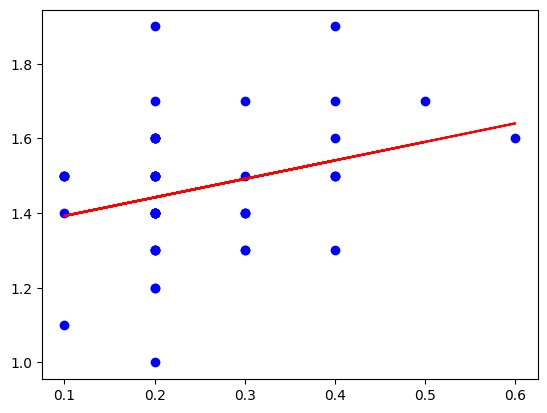

In [66]:
linea_regresion(grupo_setosa)

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
50  51            7.0           3.2            4.7           1.4   
51  52            6.4           3.2            4.5           1.5   
52  53            6.9           3.1            4.9           1.5   
53  54            5.5           2.3            4.0           1.3   
54  55            6.5           2.8            4.6           1.5   

            Species    y_pred  Error_Absoluto  Error_Cuadratico  
50  Iris-versicolor  4.398330        0.301670          0.091005  
51  Iris-versicolor  4.585262        0.085262          0.007270  
52  Iris-versicolor  4.585262        0.314738          0.099060  
53  Iris-versicolor  4.211398        0.211398          0.044689  
54  Iris-versicolor  4.585262        0.014738          0.000217  


C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\2064884464.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"] = modelo_entrenado.predict(df[["PetalWidthCm"]])
C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\2064884464.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Error_Absoluto"] = abs(df["PetalLengthCm"] - df["y_pred"])
C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\2064884464.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

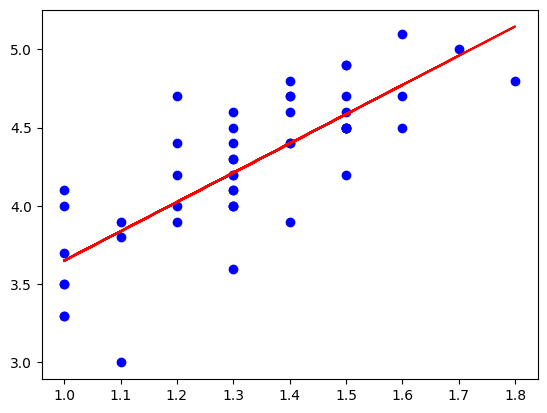

In [67]:
linea_regresion(grupo_versicolor)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
100  101            6.3           3.3            6.0           2.5   
101  102            5.8           2.7            5.1           1.9   
102  103            7.1           3.0            5.9           2.1   
103  104            6.3           2.9            5.6           1.8   
104  105            6.5           3.0            5.8           2.2   

            Species    y_pred  Error_Absoluto  Error_Cuadratico  
100  Iris-virginica  5.858801        0.141199          0.019937  
101  Iris-virginica  5.470445        0.370445          0.137230  
102  Iris-virginica  5.599897        0.300103          0.090062  
103  Iris-virginica  5.405719        0.194281          0.037745  
104  Iris-virginica  5.664623        0.135377          0.018327  


C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\2064884464.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"] = modelo_entrenado.predict(df[["PetalWidthCm"]])
C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\2064884464.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Error_Absoluto"] = abs(df["PetalLengthCm"] - df["y_pred"])
C:\Users\Hp\AppData\Local\Temp\ipykernel_14936\2064884464.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

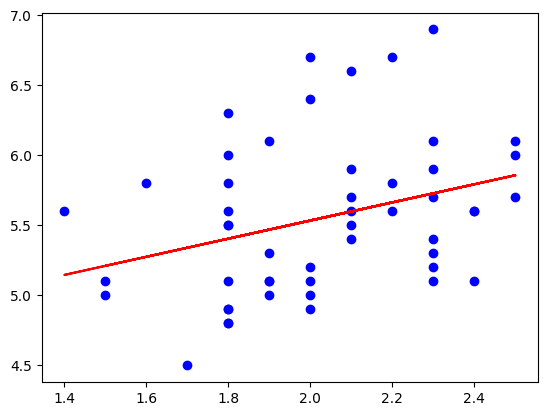

In [68]:
linea_regresion(grupo_virginica)

¿La suma de los Errores Cuadraticos del apartado 27 es igual a la
suma los tres calculados en este apartado?
¿La suma de los Errores Absolutos del apartado 27 es igual a la suma
los tres calculados en este apartado?
Compare si las medias de cada una de las variables num ́ericas son
estad ́ısticamente iguales al resto de categor ́ıas.

In [69]:

error_cuadratico = pd.DataFrame({
    "grupo": ["df","setosa","versicolor","virginica",],
    "valores": [df_iris3["Error_Cuadratico"].sum(),grupo_setosa["Error_Cuadratico"].sum(),grupo_versicolor["Error_Cuadratico"].sum(),grupo_virginica["Error_Cuadratico"].sum()]
                                })

error_cuadratico

# Las sumas son muy diferentes

,grupo,valores
0,df,33.907869
1,setosa,1.336790
2,versicolor,4.124079
3,virginica,13.376297


In [70]:

error_absoluto = pd.DataFrame({
    "grupo": ["df","setosa","versicolor","virginica",],
    "valores": [df_iris3["Error_Absoluto"].sum(),grupo_setosa["Error_Absoluto"].sum(),grupo_versicolor["Error_Absoluto"].sum(),grupo_virginica["Error_Absoluto"].sum()]
                              })

error_absoluto

# las sumas son muy diferentes


,grupo,valores
0,df,55.182016
1,setosa,6.380114
2,versicolor,11.035863
3,virginica,21.134657


In [85]:

from scipy.stats import mannwhitneyu


# hacemos un for para comparar cada una de las variables numeros de los 3 grupos de categorias que ya tenemos.


for i in listado_columnas5:

    print(f"\nComparaciones para la variable: {i}\n")



    estadistico1, p_valor1 = mannwhitneyu(grupo_setosa[i], grupo_versicolor[i])
    if p_valor1 < 0.05:
        print(f"Las medias de Setosa y Versicolor son estadísticamente diferentes para {i}. p-valor:", p_valor1)
    else:
        print(f"No hay diferencia estadística en las medias de Setosa y Versicolor para {i}. p-valor:", p_valor1)

# Comparación entre setosa y virginica
    estadistico2, p_valor2 = mannwhitneyu(grupo_setosa[i], grupo_virginica[i])
    if p_valor2 < 0.05:
        print(f"Las medias de Setosa y Virginica son estadísticamente diferentes para {i}. p-valor:", p_valor2)
    else:
        print(f"No hay diferencia estadística en las medias de Setosa y Virginica para {i}. p-valor:", p_valor2)

# Comparación entre versicolor y virginica
    estadistico3, p_valor3 = mannwhitneyu(grupo_versicolor[i], grupo_virginica[i])
    if p_valor3 < 0.05:
        print(f"Las medias de Versicolor y Virginica son estadísticamente diferentes para {i}. p-valor:", p_valor3)
    else:
        print(f"No hay diferencia estadística en las medias de Versicolor y Virginica para {i}. p-valor:", p_valor3)


Comparaciones para la variable: SepalLengthCm

Las medias de Setosa y Versicolor son estadísticamente diferentes para SepalLengthCm. p-valor: 6.170118241988663e-14
Las medias de Setosa y Virginica son estadísticamente diferentes para SepalLengthCm. p-valor: 8.284215072478573e-07
Las medias de Versicolor y Virginica son estadísticamente diferentes para SepalLengthCm. p-valor: 0.022892943486195402

Comparaciones para la variable: SepalWidthCm

Las medias de Setosa y Versicolor son estadísticamente diferentes para SepalWidthCm. p-valor: 1.0900002735172774e-08
Las medias de Setosa y Virginica son estadísticamente diferentes para SepalWidthCm. p-valor: 1.4136149063314834e-07
No hay diferencia estadística en las medias de Versicolor y Virginica para SepalWidthCm. p-valor: 0.8163769141997934

Comparaciones para la variable: PetalLengthCm

Las medias de Setosa y Versicolor son estadísticamente diferentes para PetalLengthCm. p-valor: 5.634269830542845e-18
Las medias de Setosa y Virginica son e